In [1]:
import tkinter
from tkinter import*
import tkinter as tk
from tkinter import messagebox, Label, Button, StringVar, IntVar, W, S, N, Entry
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
window = tk.Tk()
window.title("Focon Check") 
window.geometry('800x600+0+0')
header = Label(window, text="Focon Check", font=("arial",30,"bold"), fg="black").pack()

def create_connection(db_file):
    con = None
    try:
        con = sqlite3.connect(db_file, timeout=15) 
    except Error as e:
        print(e)
    
    return con

database = r"C:\sqlite3\focon2.db"
con = create_connection(database)

 #parameter
L1 = Label(window, text = "Name", font=("halvetica", 18)).place(x=10,y=100)
L2 = Label(window, text = "Age", font=("arial",18)).place(x=10,y=150)
L3 = Label(window, text = "Breakfast (Y/N)", font=("arial",18)).place(x=10,y=200)
L4 = Label(window, text = "Physical Activity", font=("arial",18)).place(x=10,y=250)
L5 = Label(window, text = "Sleeping Time", font=("arial",18)).place(x=10,y=300)
L6 = Label(window, text = "Have Medical Problem? (Y/N)", font=("arial",18)).place(x=10,y=350)
L7 = Label(window, text = "Have Emotional Problem? (Y/N)", font=("arial",18)).place(x=10,y=400)
L8 = Label(window, text = "Tanggal/bulan/tahun", font=("arial",18)).place(x=10,y=450)

#variables

nama = StringVar(window)
umur = IntVar(window)
sarapan = StringVar(window)
fisik = StringVar(window)
tidur = IntVar(window)
sakit = StringVar(window)
stress = StringVar(window)
hari = StringVar(window)

#Dictionary for drop down list


#entry
namaT = Entry(window, textvariable=nama)
namaT.place(x=220,y=105)

umurT = Entry(window, textvariable=umur)
umurT.place(x=220,y=155)

sarapanT = Entry(window, textvariable=sarapan)
sarapanT.place(x=220,y=205)

fisikT = Entry(window, textvariable=fisik)
fisikT.place(x=220,y=255)

tidurT = Entry(window, textvariable=tidur)
tidurT.place(x=220,y=305)

sakitT = Entry(window, textvariable=sakit)
sakitT.place(x=350,y=355)

stressT = Entry(window, textvariable=stress)
stressT.place(x=360,y=405)

hariT = Entry(window, textvariable=hari)
hariT.place(x=250,y=455)

c = con.cursor() #SQLite command, to connect to db so 'execute' method can be called    

#get func to isolate the text entered in the entry boxes and submit to database
def get():
        print("You have submitted a record")
        name=nama.get()
        age=umur.get()
        breakfast=sarapan.get()
        physic=fisik.get()
        sleep = tidur.get()
        sick = sakit.get()
        stres = stress.get()
        day = hari.get()
        c.execute('CREATE TABLE IF NOT EXISTS parameter (name TEXT, age INTEGER, breakfast TEXT, physic TEXT, sleep INTEGER, sick TEXT, stres TEXT, day TEXT)') #SQL synta
        c.execute('INSERT INTO parameter (name,age,breakfast,physic,sleep,sick,stres,day) VALUES (?, ?, ?, ?, ?, ?,?,?)', (name, age, breakfast, physic, sleep, sick, stres, day)) #Insert record into database.
        con.commit()
        
        
 #Reset fields after submit
        nama.set('')
        umur.set('')
        sarapan.set('')
        fisik.set('')
        tidur.set('')
        sakit.set('')
        stress.set('')  
        hari.set('')

        
#Clear boxes when submit button is hit
def clear():
    
    nama.set('')
    umur.set('')
    sarapan.set('')
    fisik.set('')
    tidur.set('')
    sakit.set('')
    stress.set('')
    hari.set('')
    
button_1 = Button(window, text="Submit",command=get)
button_1.place(x=100,y=505)

button_2 = Button(window,text= "Clear",command=clear)
button_2.place(x=10,y=505)
    
window.mainloop()

You have submitted a record


In [3]:
#LOAD SQL DATABASE TO DATAFRAME
cnx = sqlite3.connect(database)
query = "SELECT * FROM parameter"
df = pd.read_sql(query, cnx)
print (df)

                 name  age breakfast      physic  sleep sick stres       day
0               nadia   20         Y           -      7    N     N  12/12/19
1                kiki   20         Y           -      5    N     N  12/12/19
2               RIZKY   12         Y  JALAN KAKI      8    Y     N  12/12/19
3              Sabila   20         N           -      5    Y     Y  12/12/19
4        Dian Shafira   20         Y  Jalan Kaki      5    N     Y  12/12/19
5              MIQDAD   20         N  JALAN KAKI      6    N     N  12/12/19
6       YANZA HATTARI   20         N  JALAN KAKI      6    N     Y  12/12/19
7               RIFQY   20         Y  JALAN KAKI      6    N     Y  12/12/19
8                DINI   20         Y           -      7    N     N  12/12/19
9               ANINA   20         Y           -      4    N     Y  12/12/19
10              MUMUS   21         N   STRECHING      5    Y     Y  13/12/19
11               DAUD   20         N           -      6    N     N  13/12/19

In [4]:
def tree(row):
    if (row['breakfast'] == 'Y'):
        if ((row['age']>=6) & (row['age']<=10)):
            if (row['stres'] == 'Y'):
                return "tidak fokus"
            else :
                if (row['sick'] == 'Y'):
                    return "fokus"
                else :
                    return "tidak fokus"
        elif ((row['age']>10)&(row['age']<=17)):
            if (row['sick']=='Y'):
                return "tidak fokus"
            else :
                return "fokus"
        else :
            if (row['sick']=='Y'):
                return "tidak fokus"
            else :
                if (row['sleep'] > 6):
                    return "fokus"
                else :
                    return "tidak fokus"
    else :
        if ((row['physic'] == 'N')|(row['physic']=='-')):
            return "tidak fokus"
        else :
            if (row['stres'] == 'N'):
                return "fokus"
            else :
                return "tidak fokus"
            
df['output']=df.apply(lambda row:tree(row), axis=1)
print(df)

                 name  age breakfast      physic  sleep sick stres       day  \
0               nadia   20         Y           -      7    N     N  12/12/19   
1                kiki   20         Y           -      5    N     N  12/12/19   
2               RIZKY   12         Y  JALAN KAKI      8    Y     N  12/12/19   
3              Sabila   20         N           -      5    Y     Y  12/12/19   
4        Dian Shafira   20         Y  Jalan Kaki      5    N     Y  12/12/19   
5              MIQDAD   20         N  JALAN KAKI      6    N     N  12/12/19   
6       YANZA HATTARI   20         N  JALAN KAKI      6    N     Y  12/12/19   
7               RIFQY   20         Y  JALAN KAKI      6    N     Y  12/12/19   
8                DINI   20         Y           -      7    N     N  12/12/19   
9               ANINA   20         Y           -      4    N     Y  12/12/19   
10              MUMUS   21         N   STRECHING      5    Y     Y  13/12/19   
11               DAUD   20         N    

In [5]:
#df.to_sql('newdat', cnx)
df.to_sql('newdat',cnx,if_exists='replace',index=False)

In [94]:
#visualisasi 1 : NAMA, TANGGAL, DAN FOKUS ATAU TIDAK
data = df[['name','day','output']]
print(data)

                 name       day       output
0               nadia  12/12/19        fokus
1                kiki  12/12/19  tidak fokus
2               RIZKY  12/12/19  tidak fokus
3              Sabila  12/12/19  tidak fokus
4        Dian Shafira  12/12/19  tidak fokus
5              MIQDAD  12/12/19        fokus
6       YANZA HATTARI  12/12/19  tidak fokus
7               RIFQY  12/12/19  tidak fokus
8                DINI  12/12/19        fokus
9               ANINA  12/12/19  tidak fokus
10              MUMUS  13/12/19  tidak fokus
11               DAUD  13/12/19  tidak fokus
12               BAYU  13/12/19        fokus
13              ZUFFY  13/12/19  tidak fokus
14        FATHUR IMAM  13/12/19  tidak fokus
15  ABDURRAHMAN HANIF  13/12/19        fokus
16              ELVIN  13/12/19  tidak fokus
17                JUL  13/12/19  tidak fokus
18               LILI  13/12/19  tidak fokus
19    YASMIN AZ ZAHRA  13/12/19  tidak fokus
20               LULA  13/12/19  tidak fokus
21        

Data pada tanggal : 13/12/19


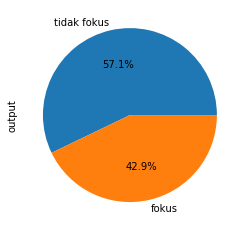

In [6]:
#visualisasi 2 : persentase jumlah siswa yang fokus dan tidak fokus pada tanggal yang dipilih
tgl = input("Data pada tanggal : ")
new = df.groupby('day').get_group(tgl)
new["output"].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [7]:
#visualisasi 3 : melihat data seseorang berdasarkan nama
word = input("Nama: ")
new1 = df.groupby('name').get_group(word)
print(new1)

Nama: ZHARFA
      name  age breakfast physic  sleep sick stres       day       output
29  ZHARFA   20         N      -      4    N     N  13/13/19  tidak fokus
39  ZHARFA   20         Y  SENAM      8    N     N  14/12/19        fokus


In [8]:
from pylab import*

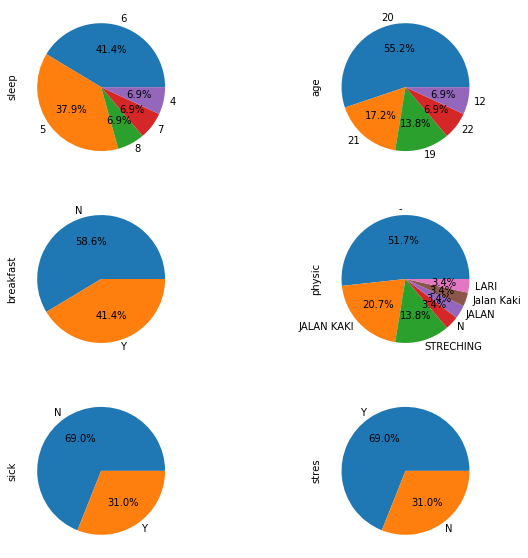

In [9]:
#visualisasi 4 : faktor dominan penyebab tidak fokus
fig,axs = plt.subplots(3,2, figsize = (10,10))

subplot(3,2,1)
new1 = df.groupby('output').get_group('tidak fokus')
new1["sleep"].value_counts().plot(kind='pie',autopct='%1.1f%%')

subplot(3,2,2)
new2 = df.groupby('output').get_group('tidak fokus')
new2["age"].value_counts().plot(kind='pie',autopct='%1.1f%%')

subplot(3,2,3)
new3 = df.groupby('output').get_group('tidak fokus')
new3["breakfast"].value_counts().plot(kind='pie',autopct='%1.1f%%')

subplot(3,2,4)
new1 = df.groupby('output').get_group('tidak fokus')
new1["physic"].value_counts().plot(kind='pie',autopct='%1.1f%%')

subplot(3,2,5)
new1 = df.groupby('output').get_group('tidak fokus')
new1["sick"].value_counts().plot(kind='pie',autopct='%1.1f%%')

subplot(3,2,6)
new1 = df.groupby('output').get_group('tidak fokus')
new1["stres"].value_counts().plot(kind='pie',autopct='%1.1f%%')



Text(0.5, 1.0, '5 Siswa dengan Intensitas Fokus Terendah')

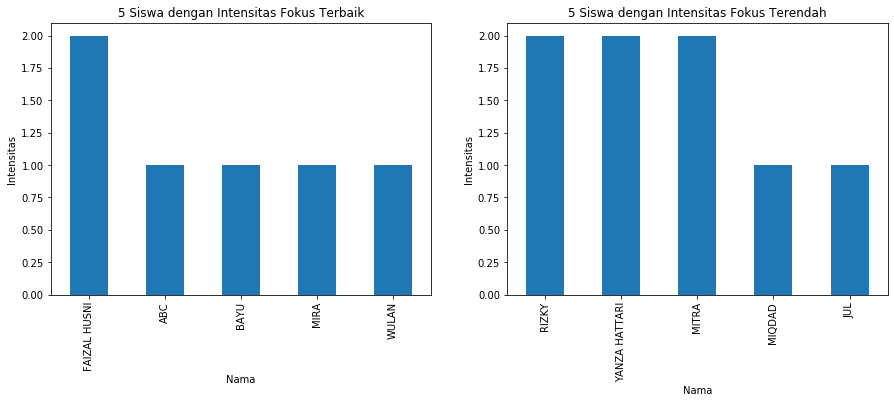

In [10]:
#visualisasi 5 : 5 orang yang paling sering fokus

fig,axs = plt.subplots(1,2, figsize = (15,5))
subplot(1,2,1)
new_1 = df.groupby('output').get_group('fokus')
new_1["name"].value_counts().head(5).plot(kind='bar')
plt.xlabel('Nama')
plt.ylabel('Intensitas')
plt.title('5 Siswa dengan Intensitas Fokus Terbaik')

subplot(1,2,2)
new_1 = df.groupby('output').get_group('tidak fokus')
new_1["name"].value_counts().head(5).plot(kind='bar')
plt.xlabel('Nama')
plt.ylabel('Intensitas')
plt.title('5 Siswa dengan Intensitas Fokus Terendah')